In [1]:
from robyn.modeling.clustering.clustering_config import ClusteringConfig, ClusterBy
from robyn.modeling.entities.pareto_result import ParetoResult
from robyn.modeling.clustering.cluster_builder import ClusterBuilder
import pandas as pd
import json
from typing import Dict, Any, List
import numpy as np
from datetime import datetime, timedelta
from robyn.data.entities.mmmdata import MMMData
from robyn.modeling.entities.modeloutputs import ModelOutputs, Trial
from robyn.modeling.pareto.pareto_optimizer import ParetoOptimizer, ParetoData
from robyn.data.entities.enums import DependentVarType, PaidMediaSigns, OrganicSigns, ContextSigns

from utils.data_mapper import import_data, load_data_from_json


/Users/funny/Documents/git/Robyn/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

import pickle
# load the variable from the file
with open("pareto_result.pkl", "rb") as f:
    pareto_result = pickle.load(f)
with open("mmmdata.pkl", "rb") as f:
    mmm_data = pickle.load(f)
print(pareto_result)  # Output: Hello, World!


ParetoResult(pareto_solutions={'2_101_7', '2_107_4', '2_107_2', '2_110_4', '2_108_5', '2_111_9', '2_104_4', '2_104_6', '2_91_7', '2_93_3', '2_109_9', '2_90_5', '2_106_4', '2_56_8', '2_101_8', '2_90_2', '2_81_7', '2_96_6', '2_99_8', '2_111_7', '2_105_6', '2_101_5', '2_95_1', '2_80_2', '2_101_4', '2_100_5', '2_109_1', '2_105_7', '2_102_3', '2_104_1', '2_83_5', '2_96_5', '2_107_3', '2_98_6', '2_112_8', '2_108_2', '2_108_4', '2_99_9', '2_111_8', '2_111_4', '2_109_3', '2_94_8', '2_95_3', '2_105_1', '2_102_6', '2_104_7', '2_101_9', '2_111_1', '2_109_7', '2_110_5', '2_98_5', '2_89_9', '2_103_2', '2_102_2', '2_99_3', '2_100_2', '2_106_8', '2_107_7', '2_110_9', '2_105_9', '2_104_8', '2_112_3', '2_102_8', '2_107_9', '2_108_1', '2_109_5', '2_112_2', '2_105_3', '2_95_5', '2_104_5', '2_86_2', '2_112_6', '2_111_3', '2_96_8', '2_110_2', '2_108_6', '2_103_9', '2_108_9', '2_101_3', '2_97_9', '2_85_2', '2_106_5', '1_108_2', '2_92_8', '2_98_2', '2_103_5', '2_109_8', '2_99_5', '2_96_2', '2_103_3', '2_88_5

In [3]:
cluster_builder = ClusterBuilder(pareto_result=pareto_result)

2024-11-04 10:22:38 - robyn.modeling.clustering.cluster_builder - INFO - Initializing ClusterBuilder


In [4]:
configs = ClusteringConfig(
    dep_var_type= DependentVarType(mmm_data.mmmdata_spec.dep_var_type),
    cluster_by = ClusterBy.HYPERPARAMETERS,
    max_clusters = 30,
    min_clusters = 3,
    weights=[1.0, 1.0, 1.0]
)
cluster_results  = cluster_builder.cluster_models(configs)

2024-11-04 10:22:38 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: nrmse_val, decomp.rssd, nrmse_train, mape, nrmse, pareto, solID, nrmse_test
2024-11-04 10:22:38 - robyn.modeling.clustering.cluster_builder - INFO - >> Auto selected k = 7 (clusters) based on minimum WSS variance
2024-11-04 10:22:38 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: nrmse_val, decomp.rssd, nrmse_train, mape, nrmse, pareto, solID, nrmse_test
/Users/funny/Documents/git/Robyn/python/src/robyn/modeling/clustering/cluster_builder.py:378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = pd.Categorical(kmeans.labels_)
/Users/funny/Documents/git/Robyn/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:390

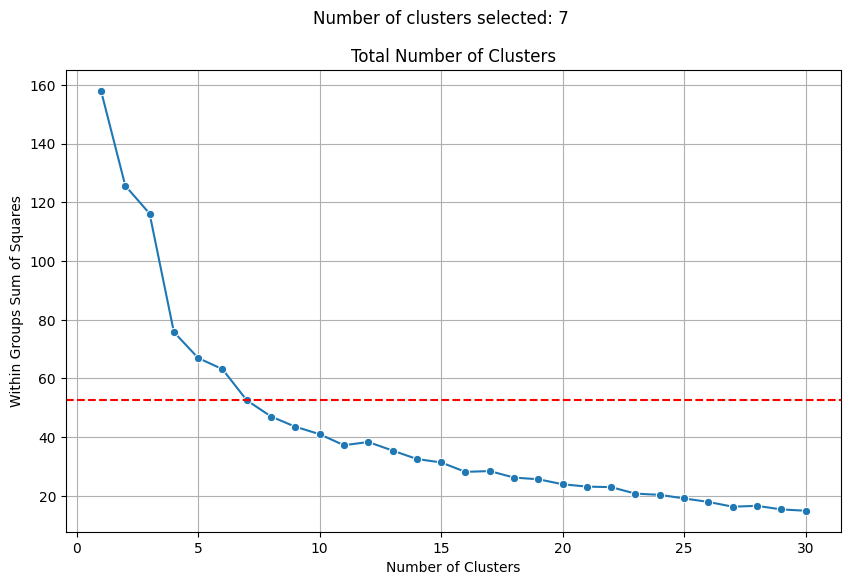

In [5]:
cluster_results.wss